In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
listings = pd.read_csv('data/listings_interm.csv')

In [3]:
listings.head(3)

,url,address,neighborhood,rent,beds,baths,flexs,zip
0,https://www.renthop.com/listings/gold-st/12c/1...,Gold St.,"Downtown Brooklyn, Northwestern Brooklyn, Broo...",3395,1,1.0,NaN,NaN
1,https://www.renthop.com/listings/gold-st/9d/15...,Gold St.,"Downtown Brooklyn, Northwestern Brooklyn, Broo...",3071,1,1.0,NaN,NaN
2,https://www.renthop.com/listings/141-east-56th...,"141 East 56th Street, Apt 11A","Midtown East, Midtown Manhattan, Manhattan",4925,2,1.0,NaN,10022.0


In [4]:
listings.describe()

,rent,beds,baths,flexs,zip
count,2000.000000,2000.000000,2000.000000,267.000000,839.000000
mean,3922.512000,1.505000,1.262000,2.524345,10413.500596
std,2821.885329,1.115615,0.530327,0.918874,550.431616
min,710.000000,0.000000,1.000000,1.000000,10001.000000
25%,2513.750000,1.000000,1.000000,2.000000,10019.000000
50%,3300.000000,1.000000,1.000000,2.000000,10034.000000
75%,4500.000000,2.000000,1.000000,3.000000,11206.000000
max,37500.000000,5.000000,5.000000,6.000000,11435.000000


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
url             2000 non-null object
address         1999 non-null object
neighborhood    2000 non-null object
rent            2000 non-null int64
beds            2000 non-null int64
baths           2000 non-null float64
flexs           267 non-null float64
zip             839 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 125.1+ KB


#### Missing Values

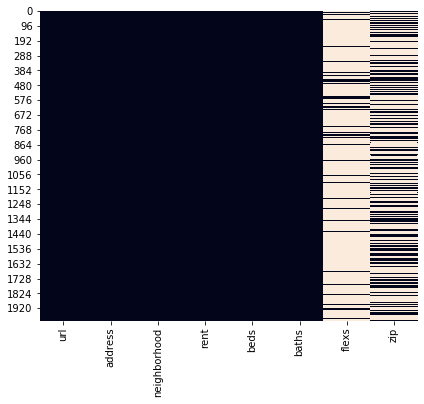

In [6]:
_ = sns.heatmap(listings.isnull(), cbar=False)
plt.subplots_adjust(right=1, top = 1.2)

### Number of listings in different neighborhood

In [7]:
# Groupby 

series =  listings.groupby('neighborhood')['rent'].count()
nhood_listings_number = series.to_frame('count').sort_values(by='count', ascending = False)
nhood_listings_number.head(10)
# listings.groupby('neighborhood')['rent'].count().to_frame('count').sort_values(by='count', ascending=False)

,count
neighborhood,
"Hell's Kitchen, Midtown Manhattan, Manhattan",173
"Financial District, Downtown Manhattan, Manhattan",171
"Upper East Side, Upper Manhattan, Manhattan",97
"Yorkville, Upper East Side, Upper Manhattan, Manhattan",88
"East Village, Downtown Manhattan, Manhattan",71
"Murray Hill, Midtown Manhattan, Manhattan",68
"Chelsea, Midtown Manhattan, Manhattan",58
"Upper West Side, Upper Manhattan, Manhattan",54
"West Village, Downtown Manhattan, Manhattan",54


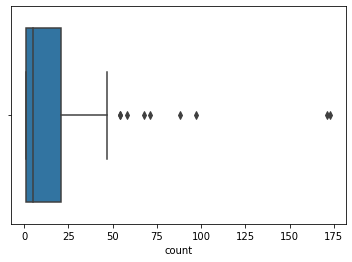

In [8]:
_ = sns.boxplot(nhood_listings_number['count'])

Most listings are in Manhattan

### Looking at upper East side of Manhattan 

https://en.wikipedia.org/wiki/Upper_East_Side

In [9]:
listings['neighborhood'].str.contains('Upper East Side').value_counts()

False    1805
True      195
Name: neighborhood, dtype: int64

In [10]:
listings[listings['neighborhood'].str.contains('Upper East Side')]\
.head(1)

,url,address,neighborhood,rent,beds,baths,flexs,zip
18,https://www.renthop.com/listings/405-east-75th...,"404 East 75th Street, Apt 3B","Upper East Side, Upper Manhattan, Manhattan",2200,1,1.0,NaN,10021.0


In [11]:
listings[listings['neighborhood'].str.contains('Upper East Side')]['neighborhood']\
.head(3)

18          Upper East Side, Upper Manhattan, Manhattan
22          Upper East Side, Upper Manhattan, Manhattan
25    Yorkville, Upper East Side, Upper Manhattan, M...
Name: neighborhood, dtype: object

In [12]:
listings[listings['neighborhood'].str.contains('Upper East Side')]['neighborhood'].value_counts()

Upper East Side, Upper Manhattan, Manhattan                   97
Yorkville, Upper East Side, Upper Manhattan, Manhattan        88
Lenox Hill, Upper East Side, Upper Manhattan, Manhattan        8
Carnegie Hill, Upper East Side, Upper Manhattan, Manhattan     2
Name: neighborhood, dtype: int64

#### Mean Rent At the Neighborhoods:

In [13]:
mean_rents_manhat_nhood = listings.groupby('neighborhood')['rent'].mean().to_frame('mean').sort_values(by='mean')

In [14]:
mean_rents_manhat_nhood= mean_rents_manhat_nhood.reset_index()
mean_rents_manhat_nhood.head()

,neighborhood,mean
0,"Briarwood, Southeastern Queens, Queens",1400.0
1,"Richmond Hill, Southwestern Queens, Queens",1450.0
2,"Bronxwood, Allerton, East Bronx, Bronx",1500.0
3,"Weeksville, Crown Heights, Central Brooklyn, B...",1680.0
4,"Getty Square, Yonkers",1750.0


Lenox Hill have highest rent. Whereas, Briarwood, Southeastern Queens is cheapest

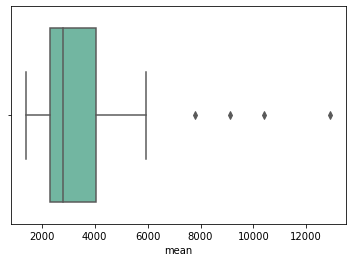

In [15]:
_ = sns.boxplot(mean_rents_manhat_nhood['mean'],palette="Set2")